In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction/Disease_prediction_dataset/Training.csv
/kaggle/input/disease-prediction/Disease_prediction_dataset/Testing.csv


# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Loading dataset

In [3]:
train_data= pd.read_csv('/kaggle/input/disease-prediction/Disease_prediction_dataset/Training.csv')
test_data = pd.read_csv('/kaggle/input/disease-prediction/Disease_prediction_dataset/Testing.csv')

In [4]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
train_data.shape

(4920, 134)

In [7]:
test_data.shape

(42, 133)

In [8]:
train_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# Creating Output class variable IsDengue using prognosis column

In [9]:
train_data.loc[train_data['prognosis'] == 'Dengue', 'IsDengue'] = 1

In [10]:
train_data.loc[train_data['prognosis'] != 'Dengue', 'IsDengue'] = 0

In [11]:
train_data['IsDengue'].value_counts()

0.0    4800
1.0     120
Name: IsDengue, dtype: int64

**120** patient records out of **4920** diagnosed as dengue in train data

In [12]:
test_data.loc[test_data['prognosis'] == 'Dengue', 'IsDengue'] = 1
test_data.loc[test_data['prognosis'] != 'Dengue', 'IsDengue'] = 0
test_data['IsDengue'].value_counts()

0.0    41
1.0     1
Name: IsDengue, dtype: int64

Only **1** patient record out of 42 is positive dengue case in test data

In [13]:
train_data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
IsDengue                   0
Length: 135, dtype: int64

all records of **Unnamed: 133** column contain null values

In [14]:
train_data.drop("Unnamed: 133",inplace=True,axis=1)
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,IsDengue
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0


In [15]:
test_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
IsDengue                0
Length: 134, dtype: int64

## Concatenating train data and test as test data contains only 1 positive dengue case 

In [16]:
df = pd.concat([train_data, test_data], axis=0)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,IsDengue
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0


In [17]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
IsDengue                0
Length: 134, dtype: int64

In [18]:
df['IsDengue'].value_counts()

0.0    4841
1.0     121
Name: IsDengue, dtype: int64

In [19]:
df.shape

(4962, 134)

In [20]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

# Dropping prognosis column

In [21]:
df.drop("prognosis",inplace=True,axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,IsDengue
2716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
641,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1900,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1489,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [22]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,IsDengue
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176,0.024385
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478,0.154258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
y=df[['IsDengue']]

In [24]:
df.corr()['IsDengue'].sort_values(ascending=False)[1:].head(15).to_frame()

,IsDengue
pain_behind_the_eyes,1.000000
back_pain,0.717106
red_spots_over_body,0.669154
muscle_pain,0.457651
joint_pain,0.370726
malaise,0.365117
skin_rash,0.340842
chills,0.338002
headache,0.288822
nausea,0.286867


Top correlated features

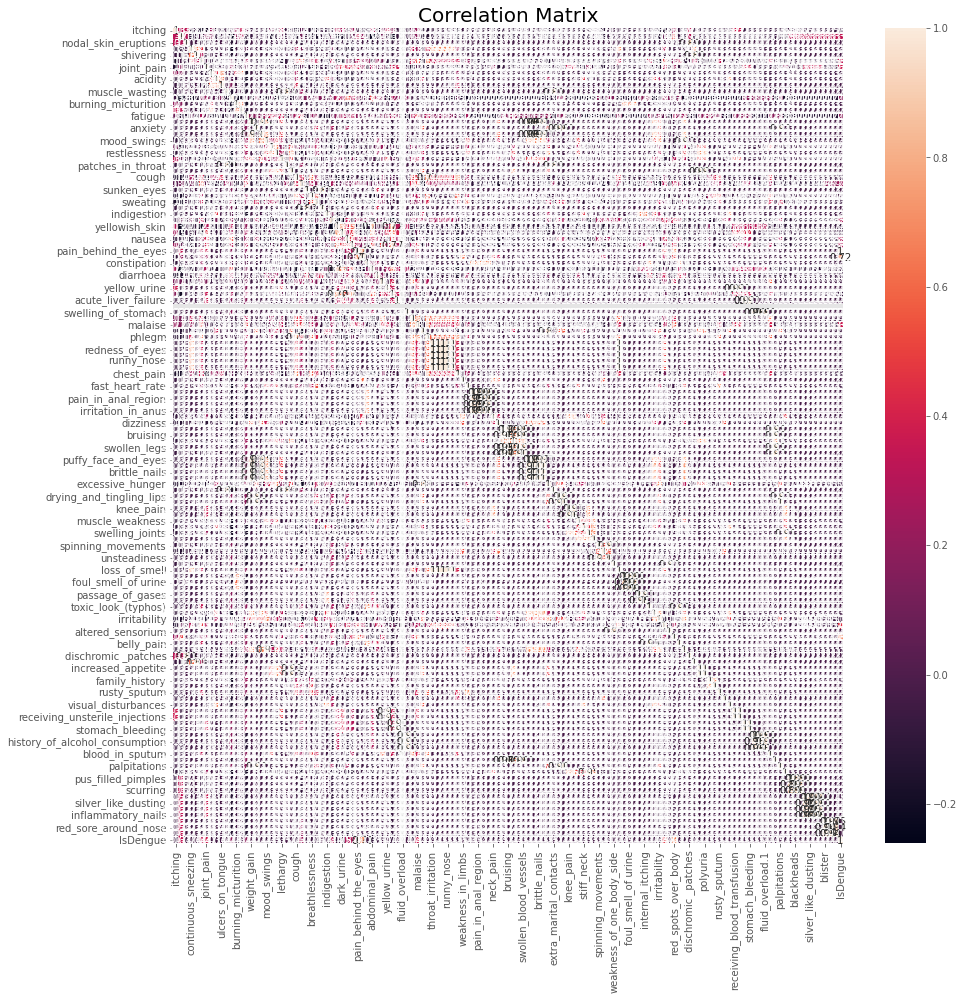

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);
plt.show()

In [26]:
# fig, ax = plt.subplots()
# sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.4f', 
#             cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
# ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
# plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [27]:
df.corr()['IsDengue'].sort_values(ascending=False)[1:] # importance of all features

pain_behind_the_eyes    1.000000
back_pain               0.717106
red_spots_over_body     0.669154
muscle_pain             0.457651
joint_pain              0.370726
                          ...   
chest_pain             -0.064178
yellowing_of_eyes      -0.070498
yellowish_skin         -0.075426
abdominal_pain         -0.081461
fluid_overload               NaN
Name: IsDengue, Length: 132, dtype: float64

In [28]:
df.corr()['IsDengue'].sort_values(ascending=False)[1:].head(15).to_frame() # important features

,IsDengue
pain_behind_the_eyes,1.000000
back_pain,0.717106
red_spots_over_body,0.669154
muscle_pain,0.457651
joint_pain,0.370726
malaise,0.365117
skin_rash,0.340842
chills,0.338002
headache,0.288822
nausea,0.286867


In [29]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'IsDengue'],
      dtype='object', length=133)

In [30]:
features = df.drop("IsDengue", axis = 1)
features.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
2716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
641,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,y,test_size = 0.2,random_state =2)

In [32]:
X_train.shape

(3969, 132)

In [33]:
y_train.value_counts()

IsDengue
0.0         3872
1.0           97
dtype: int64

Training set contains 92 positive dengue records

In [34]:
X_test.shape

(993, 132)

In [35]:
y_test.value_counts()

IsDengue
0.0         969
1.0          24
dtype: int64

Test set contains 29 positive dengue records

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
  
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [37]:
knn_pred=knn.score(X_test, y_test)

knn_train_accuracy =knn.score(X_train,y_train)
knn_accuracy = knn.score(X_test,y_test)
pred_prob_knn = knn.predict_proba(X_test)
print("Training score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test, y_test)))

Training score: 1.000
Test score: 1.000


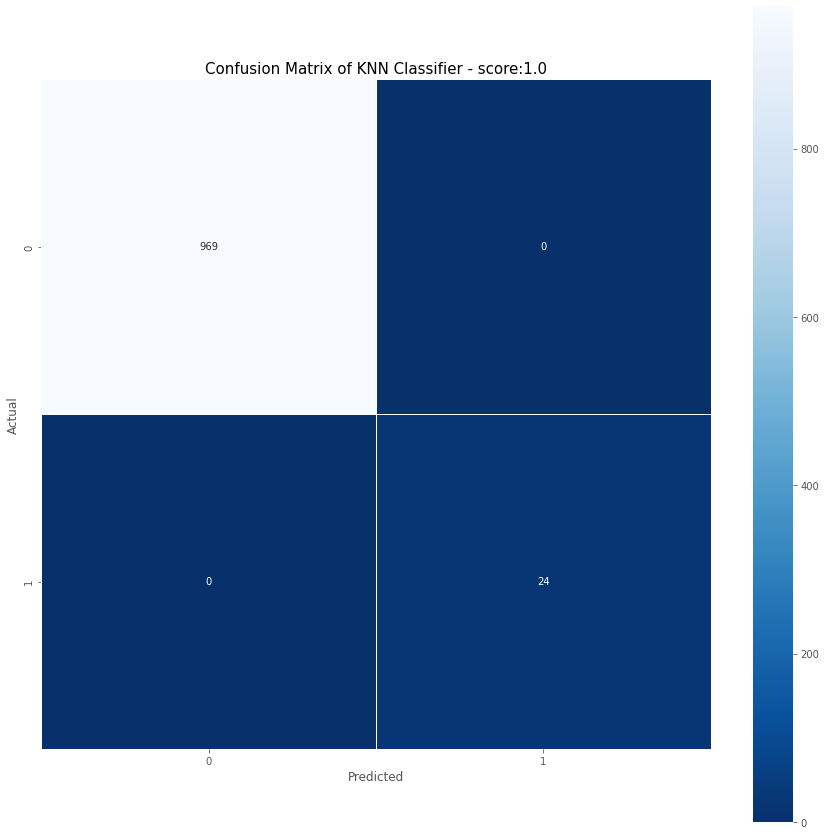

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       969
         1.0       1.00      1.00      1.00        24

    accuracy                           1.00       993
   macro avg       1.00      1.00      1.00       993
weighted avg       1.00      1.00      1.00       993



In [38]:
knn_model=KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train.values.ravel())
y_pred=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Confusion Matrix of KNN Classifier - score:'+str(metrics.accuracy_score(y_test,y_pred))

plt.title(all_sample_title, size = 15);

plt.show()

print(metrics.classification_report(y_test,y_pred))

In [39]:
y_test.head()

,IsDengue
3892,0.0
3497,0.0
2471,0.0
98,0.0
65,0.0


In [40]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train,y_train.values.ravel())

nb_score = nb_model.score(X_test,y_test)

nb_train_acc = nb_model.score(X_train,y_train)
pred_prob_nb = nb_model.predict_proba(X_test)

print("Training accuracy = ",nb_model.score(X_train,y_train))

nb_accuracy = nb_model.score(X_test,y_test)
print("Testing accuracy = ",nb_model.score(X_test,y_test))

Training accuracy =  1.0
Testing accuracy =  1.0


# Training Models

In [41]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM-Linear', SVC(kernel="linear", C=1.0)))
models.append(('SVM-RBF',SVC(kernel="rbf",gamma=0.7, C=1.0)))
models.append(('SVM-Poly deg 3',SVC(kernel="poly",degree = 3 ,gamma="auto", C=1.0)))

In [42]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier()

In [43]:
models.append(('Ensemble Learning',
               StackingClassifier(
                   estimators=[('logistics_regression', lr),  ('decision_tree', dt)], 
                   final_estimator= rf)
              ))

In [44]:
#models.append(('Decision Tree', DecisionTreeClassifier()))

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve

results = []  # accuracy
CM = []
names = []
scoring = 'accuracy'
seed = 5

# Defining model_performance as a DataFrame to store evaluation metrics

model_performance = pd.DataFrame(columns=['Classifiers', 'fpr','tpr','auc','Accuracy','Precision','Recall','F1-Score'])

for name, model in models:
    
    mod = model.fit(X_train, y_train.values.ravel())
    y_pred = mod.predict(X_test)

    CM.append([name, metrics.confusion_matrix(y_test, y_pred)])   # maintaining list of confusion matrix for each model
    
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)

    model_performance = model_performance.append({'Classifiers':name,
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc,
                    'Accuracy':cv_results.mean(),
                    'Precision': precision_score(y_test, y_pred),
                    'Recall': recall_score(y_test, y_pred),
                    'F1-Score': f1_score(y_test, y_pred)}, ignore_index=True)

    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Set name of the classifiers as index labels
model_performance.set_index('Classifiers', inplace=True)

KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM-Linear: 1.000000 (0.000000)
SVM-RBF: 1.000000 (0.000000)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM-Poly deg 3: 0.975557 (0.007035)
Ensemble Learning: 1.000000 (0.000000)


# Model Evaluation

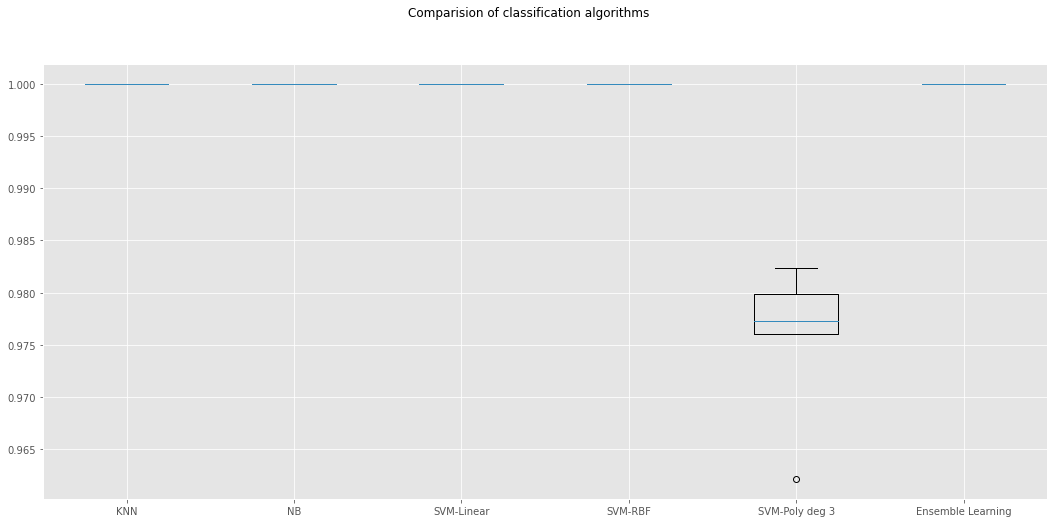

In [46]:
fig = plt.figure(figsize=(18,8))
fig.suptitle('Comparision of classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Text(0.5, 0.98, 'Confusion Matrices of Classifiers')

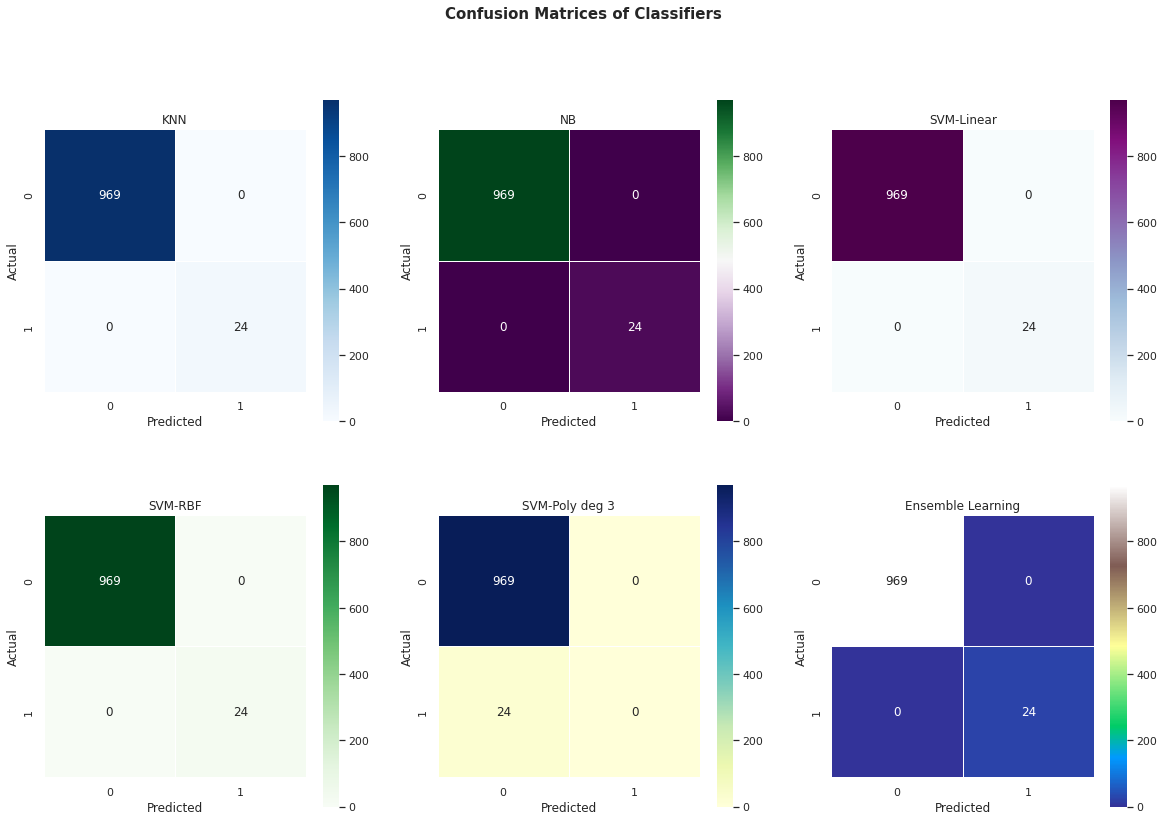

In [47]:
sns.set()

fig, axs = plt.subplots(2, 3, figsize=(20,13))

sns.heatmap(CM[0][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues', ax = axs[0,0]);
axs[0, 0].set_title(CM[0][0])

sns.heatmap(CM[1][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'PRGn',ax = axs[0,1]);
axs[0, 1].set_title(CM[1][0])

sns.heatmap(CM[2][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu',ax = axs[0,2]);
axs[0, 2].set_title(CM[2][0])

sns.heatmap(CM[3][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens' ,ax = axs[1,0]);
axs[1, 0].set_title(CM[3][0])

sns.heatmap(CM[4][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu' ,ax = axs[1,1]);
axs[1, 1].set_title(CM[4][0])

sns.heatmap(CM[5][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'terrain' ,ax = axs[1,2]);
axs[1, 2].set_title(CM[5][0])


for ax in axs.flat:
    ax.set(xlabel='Predicted', ylabel='Actual')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


fig.suptitle('Confusion Matrices of Classifiers', fontweight='bold', fontsize=15)

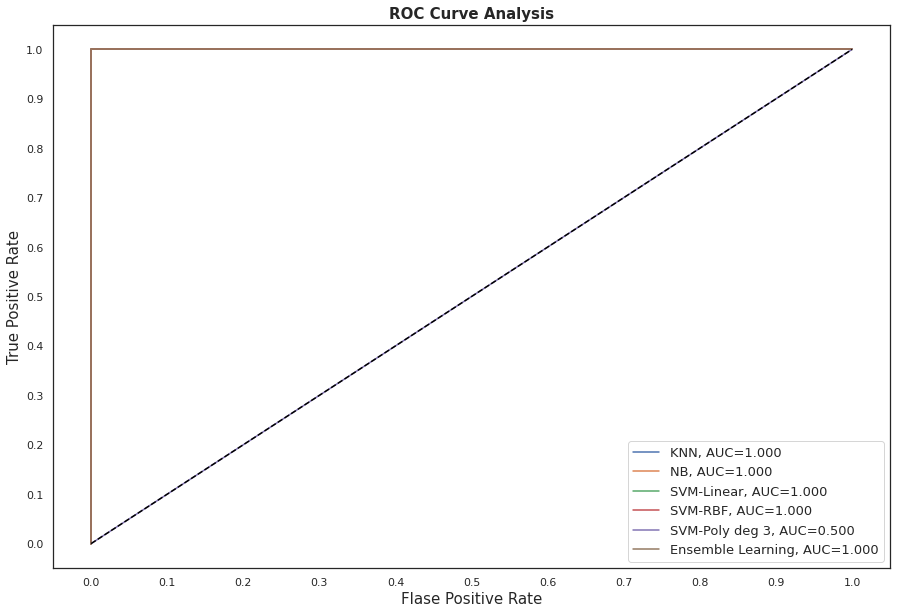

In [48]:
import numpy as np

model_performance['auc']= round(model_performance['auc'],3)

sns.set_theme(style = 'white')

fig = plt.figure(figsize=(15,10))

for i in model_performance.index:
    plt.plot(model_performance.loc[i]['fpr'], 
             model_performance.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, model_performance.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [49]:
performance = model_performance.reset_index()
performance = performance[['Classifiers','auc','Accuracy','Precision','Recall','F1-Score']]

In [50]:
performance

,Classifiers,auc,Accuracy,Precision,Recall,F1-Score
0,KNN,1.0,1.000000,1.0,1.0,1.0
1,NB,1.0,1.000000,1.0,1.0,1.0
2,SVM-Linear,1.0,1.000000,1.0,1.0,1.0
3,SVM-RBF,1.0,1.000000,1.0,1.0,1.0
4,SVM-Poly deg 3,0.5,0.975557,0.0,0.0,0.0
5,Ensemble Learning,1.0,1.000000,1.0,1.0,1.0


In [51]:
performance.sort_values('Accuracy',ascending = False).head(7)

,Classifiers,auc,Accuracy,Precision,Recall,F1-Score
0,KNN,1.0,1.000000,1.0,1.0,1.0
1,NB,1.0,1.000000,1.0,1.0,1.0
2,SVM-Linear,1.0,1.000000,1.0,1.0,1.0
3,SVM-RBF,1.0,1.000000,1.0,1.0,1.0
5,Ensemble Learning,1.0,1.000000,1.0,1.0,1.0
4,SVM-Poly deg 3,0.5,0.975557,0.0,0.0,0.0


In [52]:
performance.sort_values(['auc','Accuracy'],ascending = False).head(7)

,Classifiers,auc,Accuracy,Precision,Recall,F1-Score
0,KNN,1.0,1.000000,1.0,1.0,1.0
1,NB,1.0,1.000000,1.0,1.0,1.0
2,SVM-Linear,1.0,1.000000,1.0,1.0,1.0
3,SVM-RBF,1.0,1.000000,1.0,1.0,1.0
5,Ensemble Learning,1.0,1.000000,1.0,1.0,1.0
4,SVM-Poly deg 3,0.5,0.975557,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

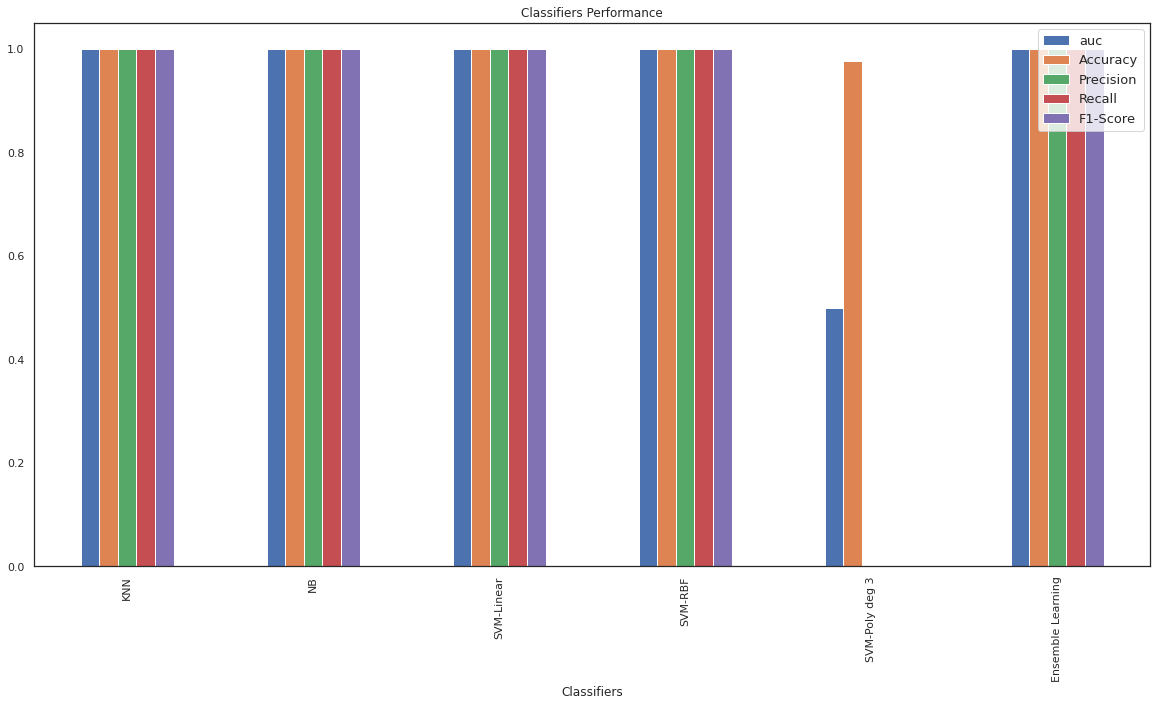

In [53]:
sns.set_theme(style = 'white')

plt.figure()
plt.rcParams.update({'font.size': 22}) 

performance.plot(x='Classifiers',
        kind='bar',
        stacked=False,
        title='Classifiers Performance',
        figsize = (20,10))

plt.legend(prop={'size':13}, loc='upper right')

plt.savefig('classifiers_performance.jpeg', bbox_inches='tight', pad_inches=0.0)